# **Business Case: Walmart - Confidence Interval and CLT**

### **About Walmart**

* Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. 
* Walmart has more than 100 million customers worldwide.

### **Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [1]:
#Import the libraries:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\walmart_data.csv")

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


# 1.Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
df.shape

(550068, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### Insights

- From the above analysis, it is clear that, data has total of 10 features with lots of mixed alpha numeric data. 


- Apart from Purchase Column, all the other data types are of categorical type. We will change the datatypes of all such columns to category

## Changing the Datatype of Columns


In [7]:
for i in df.columns[:-1]:
    df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


## Statistical Summary
### Satistical summary of object type columns

In [8]:
df.describe(include = 'category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


### Insights

**1. User_ID** - Among `5,50,068` transactions there are `5891` unique user_id, indicating same customers buying multiple products.

**2. Product_ID** - Among `5,50,068` transactions there are `3631` unique products,with the product having the code `P00265242` being the `highest seller`, with a maximum of `1,880 units` sold.

**3. Gender** - Out of `5,50,068` transactions, 4,14,259 `(nearly 75%)` were done by male gender indicating a significant disparity in purchase behavior between males and females during the Black Friday event.

**4. Age** - We have `7` unique age groups in the dataset. `26 - 35` Age group has maximum of `2,19,587` transactions. We will analyse this feature in detail in future

**5. Stay_In_Current_City_Years** - Customers with `1` year of stay in current city accounted to maximum of `1,93,821` transactions among all the other customers with (0,2,3,4+) years of stay in current city

**6. Marital_Status** - `59%` of the total transactions were done by `Unmarried Customers` and `41%` by `Married Customers`.

### Satistical summary of  numerical data type columns

In [9]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


### Insights

`The purchase amounts` vary widely, with the minimum recorded purchase being `$12` and the maximum reaching `$23961`. The `median` purchase amount of `$8047` is notably lower than the `mean` purchase amount of `$9264`, indicating a `right-skewed distribution` where a few high-value purchases pull up the mean

## Duplicate Detection

In [10]:
df.duplicated().value_counts()

False    550068
Name: count, dtype: int64

### Insights

- There are no duplicate entries in the dataset

# 2.Non-Graphical Analysis: Value counts and unique attributes

In [11]:
# checking the unique values for columns
for i in df.columns:
    print('Unique Values in',i,'column are :-')
    print(df[i].unique())
    print('.'*70)

Unique Values in User_ID column are :-
[1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
Length: 5891
Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040]
......................................................................
Unique Values in Product_ID column are :-
['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642', 'P0099742', 'P0099842', 'P0099942']
......................................................................
Unique Values in Gender column are :-
['F', 'M']
Categories (2, object): ['F', 'M']
......................................................................
Unique Values in Age column are :-
['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17'

In [12]:
# checking the value counts for columns
for i in df.columns:
    print('Unique Values in',i,'column are :-')
    print(df[i].value_counts())
    print('-'*70)

Unique Values in User_ID column are :-
User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002111       7
1005391       7
1002690       7
1005608       7
1000708       6
Name: count, Length: 5891, dtype: int64
----------------------------------------------------------------------
Unique Values in Product_ID column are :-
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00068742       1
P00012342       1
P00162742       1
P00091742       1
P00231642       1
Name: count, Length: 3631, dtype: int64
----------------------------------------------------------------------
Unique Values in Gender column are :-
Gender
M    414259
F    135809
Name: count, dtype: int64
----------------------------------------------------------------------
Unique Values in Age column are :-
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-1

## Missing Value Analysis

In [13]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

### Insights

- The dataset does not contain any missing values.

# 3.Visual Analysis - Univariate & Bivariate

### univariate analysis

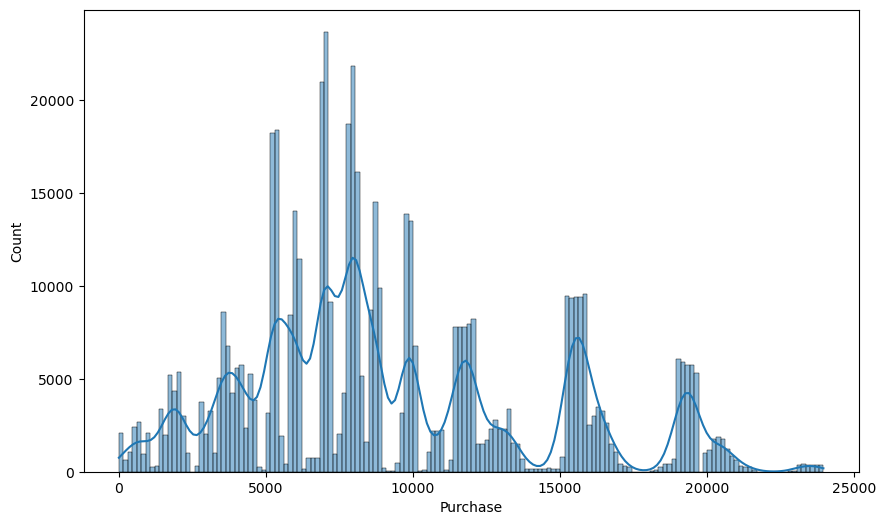

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Purchase", kde=True)
plt.show()

## Insights:
- We can see purchase value between 5000 and 10000 have higher count. From the initial observation we have already seen the mean and median is 9263 and 8047 respectively. Also, we can see there are outliers in the data.

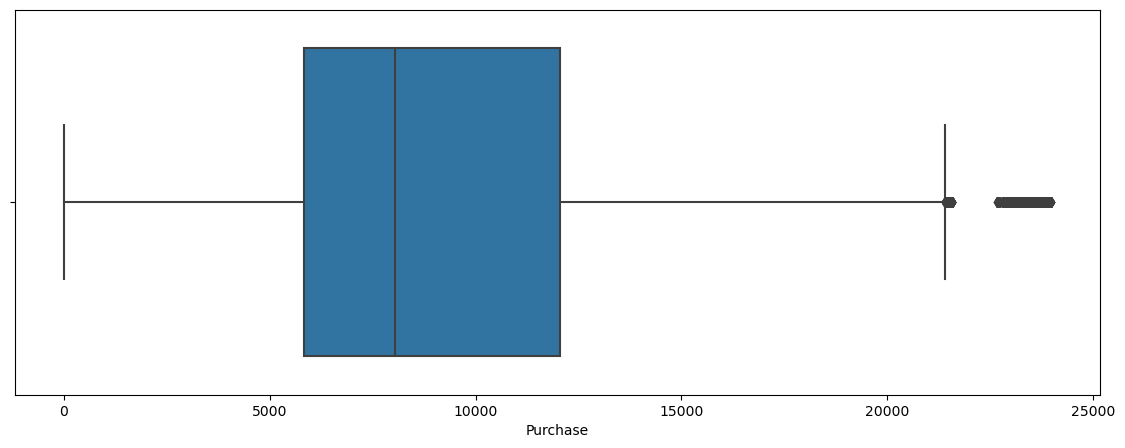

In [15]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

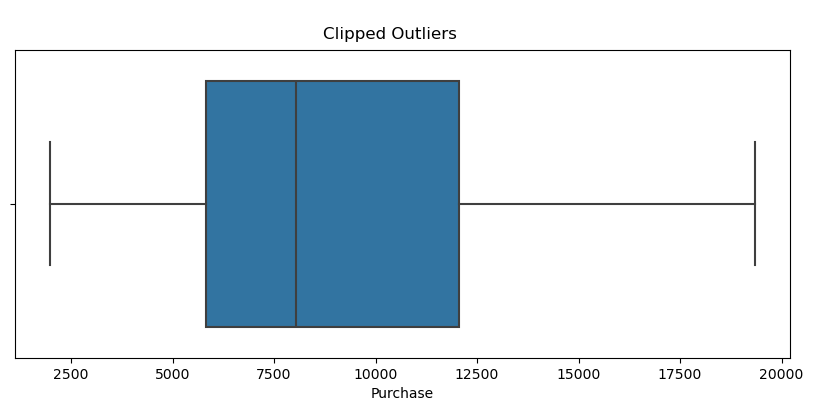

In [16]:
# Calculate the 5th and 95th percentiles
percentile_5 = np.percentile(df['Purchase'], 5)
percentile_95 = np.percentile(df['Purchase'], 95)

# Clip the data between the 5th and 95th percentiles
clipped_data = np.clip(df['Purchase'], percentile_5, percentile_95)

plt.figure(figsize=(10, 4))
plt.suptitle("\nClipped Outliers\n\n")
sns.boxplot(data=df,x=clipped_data)
plt.show()

## Insights:
- Based on this graphical representation, it is evident that both Purchase has only a
minor presence of outliers which is 0.49%.

#### Understanding the distribution of data for the categorical variables
- Gender
- Age
- Occupation
- City_Category
- Stay_In_Current_City_Years
- Marital_Status
- Product_Category

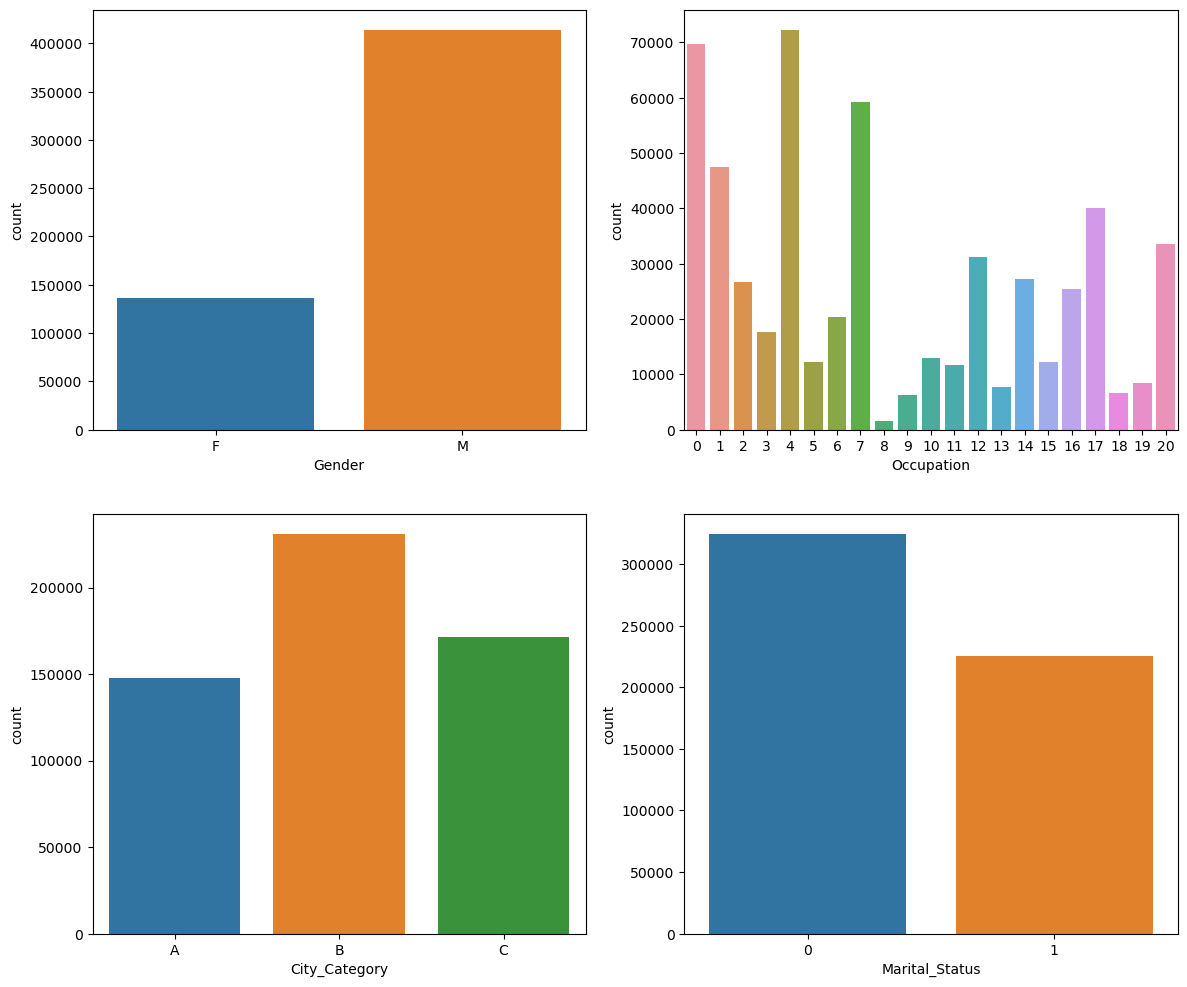

In [17]:
categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()

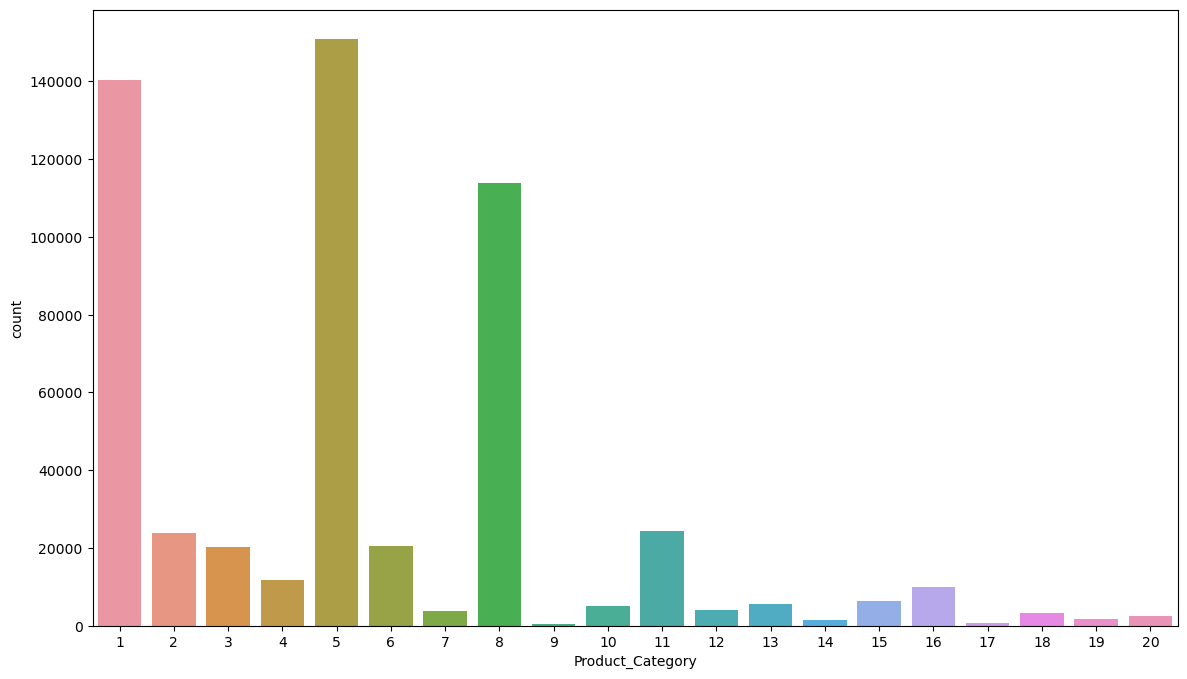

In [18]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Product_Category')
plt.show()

## Insights:
- Most of the users are `Male`
- There are 20 different types of `Occupation` and `Product_Category`
- More users belong to `B` `City_Category`
- More users are `Single` as compare to `Married`
- `Product_Category` - `1, 5, 8, & 11` have highest purchasing frequency.

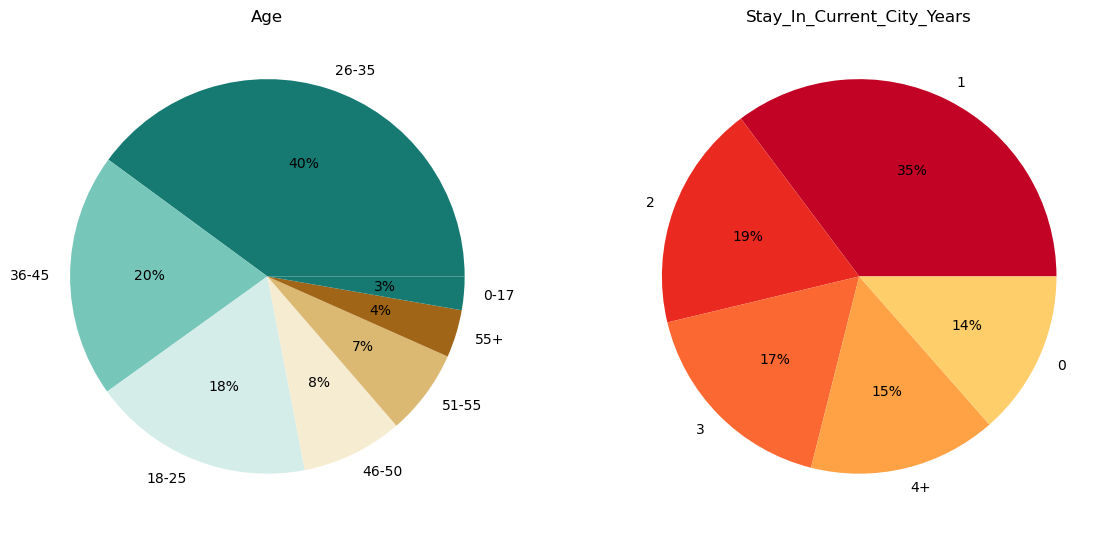

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

data = df['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("Age")

data = df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")

plt.show()

## Insights:
- ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
- 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years, 15% from 4 years+, 14% are new to city 

### Bi-variate Analysis

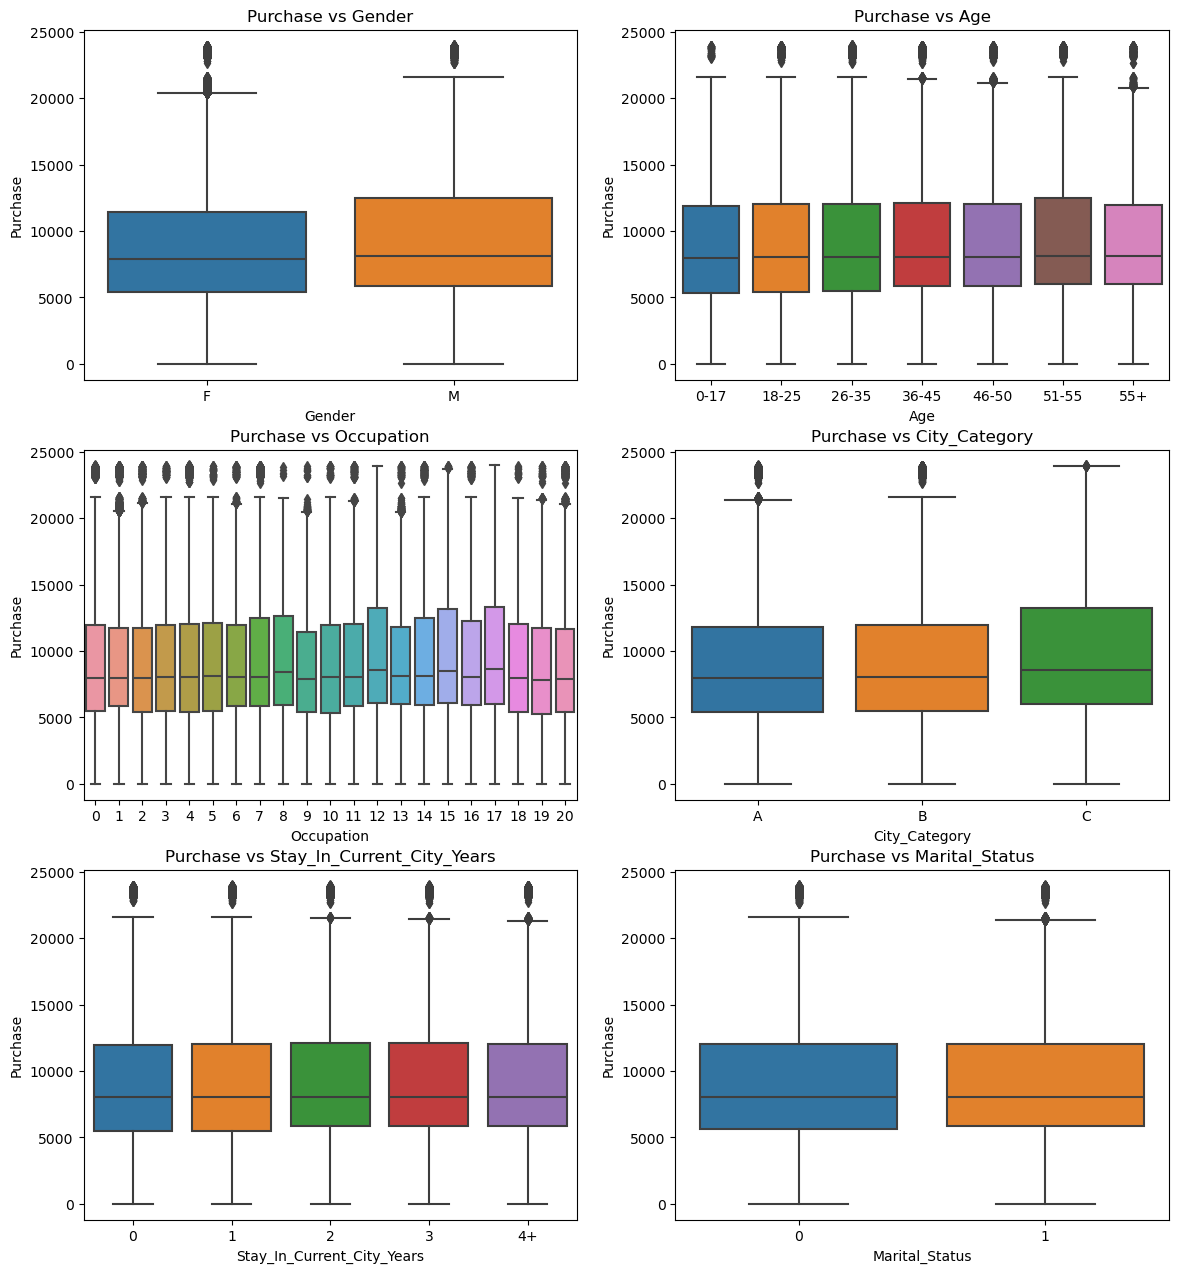

In [20]:
attr = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attr[count], ax=axs[row, col],)
        axs[row,col].set_title(f"Purchase vs {attr[count]}")
        count += 1
plt.show()

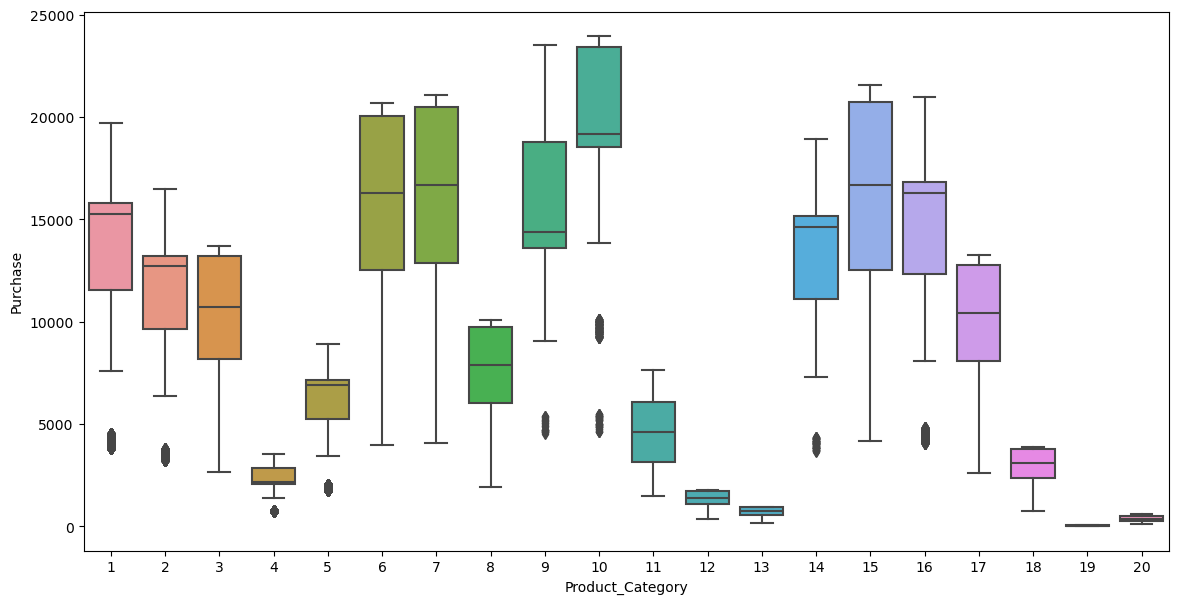

In [21]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, y='Purchase', x='Product_Category')
plt.show()

## Insights:
- The spending behaviour for males and females are similar as we had seen from the above histplot. Males purchasing value are in the little higher range than females.
- Among differnt age categories, we see similar purchase behaviour. For all age groups, most of the purchases are of the values between 5k to 12k with all have some outliers.
- Among different occupation as well, we see similar purchasing behaviour in terms of the purchase values.
- Similarly for City category, stay in current city years, marital status - we see the users spends mostly in the range of 5k to 12k.
- We see variations among product categories. Product category 10 products are the costliest ones. Also, there are few outliers for some of the product categories.

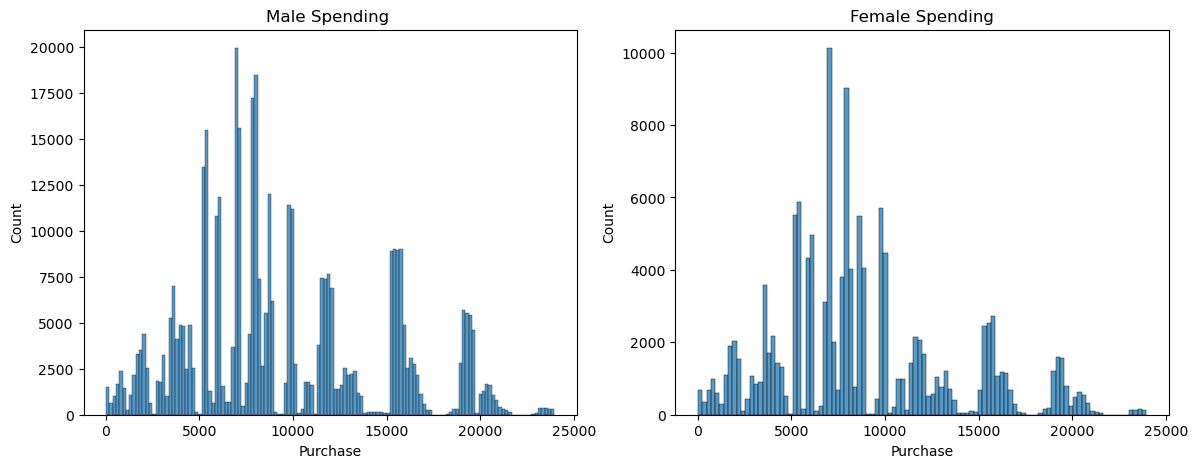

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
sns.histplot(data=df[df['Gender']=='M']['Purchase'], ax=axs[0]).set_title("Male Spending ")
sns.histplot(data=df[df['Gender']=='F']['Purchase'], ax=axs[1]).set_title("Female Spending")
plt.show()

## Insights:
- From the above histplot, we can clearly see spending behaviour is very much similar in nature for both males and females as the maximum purchase count are between the purchase value range of 5000-10000 for both. But, the purchase count are more in case of males.

### Multivariate Analysis

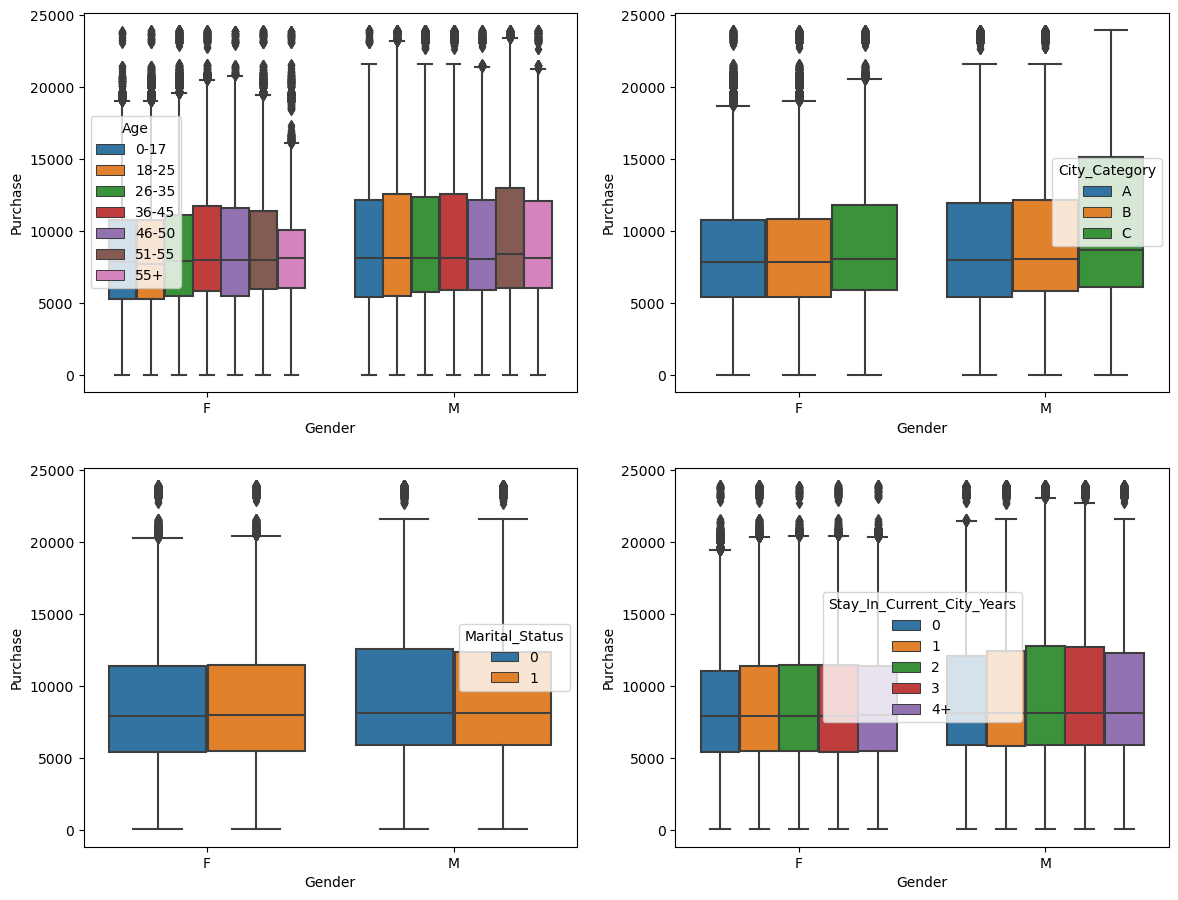

In [23]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', ax=axs[1,1])

plt.show()

## Insights:
- The purchasing pattern is very much similar for males and females even among differnt age groups.
- The purchasing behaviour of males and females basis different citi categories is also similar in nature. Still,  males from city category B tends to purchase costlier products in comparison to females.
- Males and females spending behaviour remains similar even when take into account their marital status.
- Purchase values are similar for males and females basis Stay_in_current_city_years. Although, Males buy slightly high value products.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


## *What products are different age groups buying?*

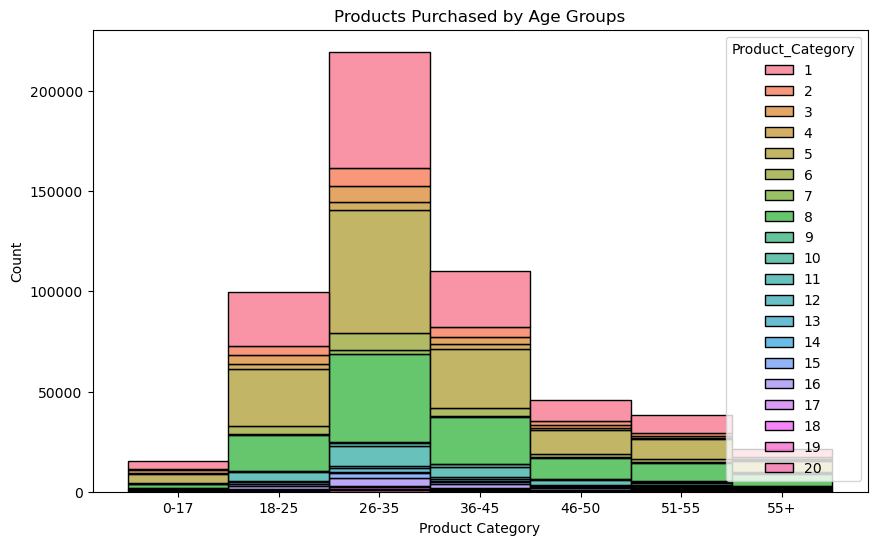

In [25]:
# Histogram of Product Purchases by Age Groups
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Product_Category', multiple='stack')
plt.title("Products Purchased by Age Groups")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.show()

## Insights:
- Age 26-35 has more count as compared other age and product category 1,5 and 8 has more compared to other
- Age 18-25 and 36-45 less count compared to age 26-35 and product category 1,5 and 8 has more compared to other

## *Is there a relationship between age, marital status, and the amount spent?*

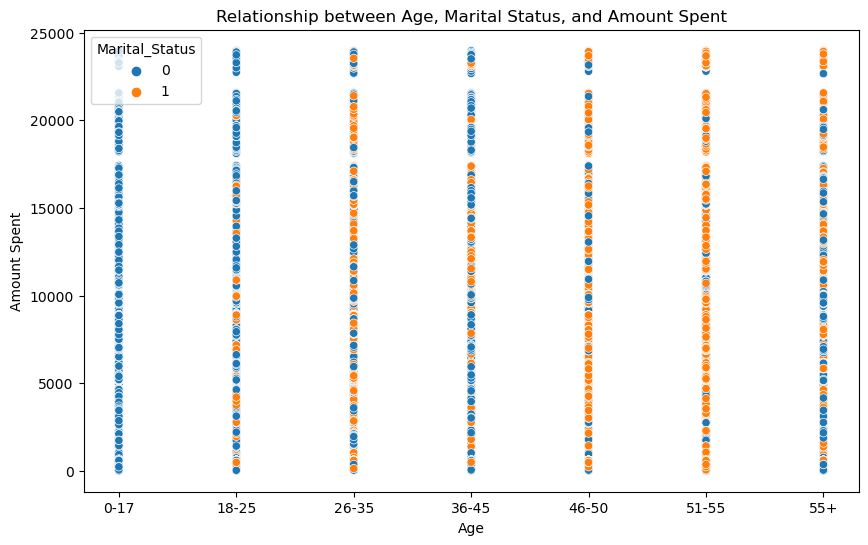

In [26]:
# Scatter plot of Age, Marital Status, and Amount Spent
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Purchase', hue='Marital_Status')
plt.title("Relationship between Age, Marital Status, and Amount Spent")
plt.xlabel("Age")
plt.ylabel("Amount Spent")
plt.show()

## Insights:
- Age 0-17 has more no of unmarried compared to other age group
- Age 46-50 and 51-55 has more no of married compared to other age group
- Age 55+ has approximately same no of unmarried and married count

## *Are there preferred product categories for different genders?*

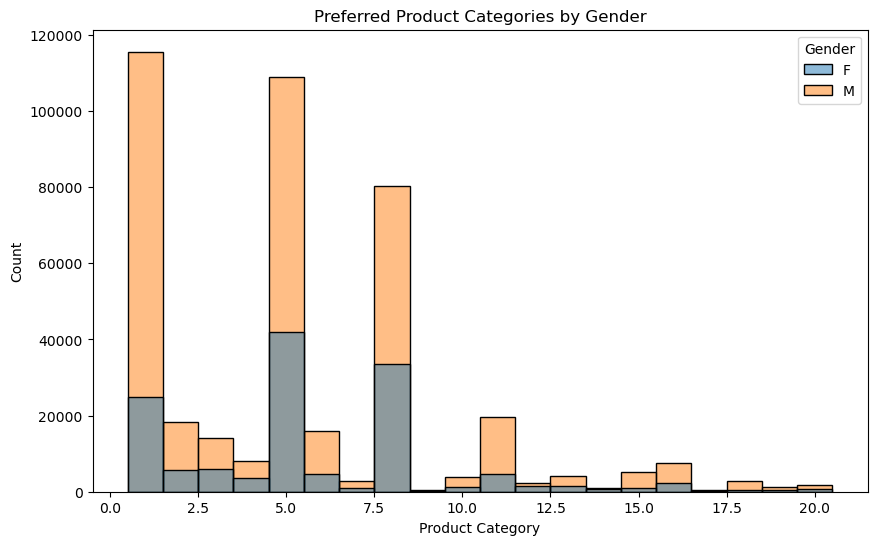

In [27]:
# Histogram of Product Categories by Gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Product_Category', hue='Gender')
plt.title("Preferred Product Categories by Gender")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.show()

## Insights:
- product category 1,5 and 8 has more count compared to other
- product category 1 has more male compared female this is same for produt category 5 and 8 also

In [28]:
#creating a function to calculate confidence interval
def confidence_interval(data,ci):
    #converting the list to series
    l_ci = (100-ci)/2
    u_ci = (100+ci)/2
    
    #calculating lower limit and upper limit of confidence interval
    interval = np.percentile(data,[l_ci,u_ci]).round(0)
    
    return interval

### How does gender affect the amount spent?

In [29]:
#defining a function for plotting the visual for given confidence interval

def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (15,8))
    gs = fig.add_gridspec(2,2)

    #creating separate data frames for each gender
    df_male = df.loc[df['Gender'] == 'M','Purchase']
    df_female = df.loc[df['Gender'] == 'F','Purchase']

    #sample sizes and corresponding plot positions
    sample_sizes = [(300,0,0),(3000,0,1),(30000,1,0)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    male_samples = {}
    female_samples = {}
    
    for i,x,y in sample_sizes:
        male_means = [] #list for collecting the means of male sample
        female_means = [] #list for collecting the means of female sample

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            male_bootstrapped_samples = np.random.choice(df_male,size = i)
            female_bootstrapped_samples = np.random.choice(df_female,size = i)

            #calculating mean of those samples
            male_sample_mean = np.mean(male_bootstrapped_samples)
            female_sample_mean = np.mean(female_bootstrapped_samples)

            #appending the mean to the list
            male_means.append(male_sample_mean)
            female_means.append(female_sample_mean)
            
        #storing the above sample generated
        male_samples[f'{ci}%_{i}'] = male_means
        female_samples[f'{ci}%_{i}'] = female_means

        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'male_means':male_means,'female_means':female_means})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x,y])
        
        #plots for male and female
        sns.kdeplot(data = temp_df,x = 'male_means',color ="#3A7089" ,fill = True, alpha = 0.5,ax = ax,label = 'Male')
        sns.kdeplot(data = temp_df,x = 'female_means',color ="#4b4b4c" ,fill = True, alpha = 0.5,ax = ax,label = 'Female')

        #calculating confidence intervals for given confidence level(ci)
        m_range = confidence_interval(male_means,ci)
        f_range = confidence_interval(female_means,ci)

        #plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="#3A7089",linestyle = '--')

        for k in f_range:
            ax.axvline(x = k,ymax = 0.9, color ="#4b4b4c",linestyle = '--')


        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()
    
    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()
    
    return male_samples,female_samples

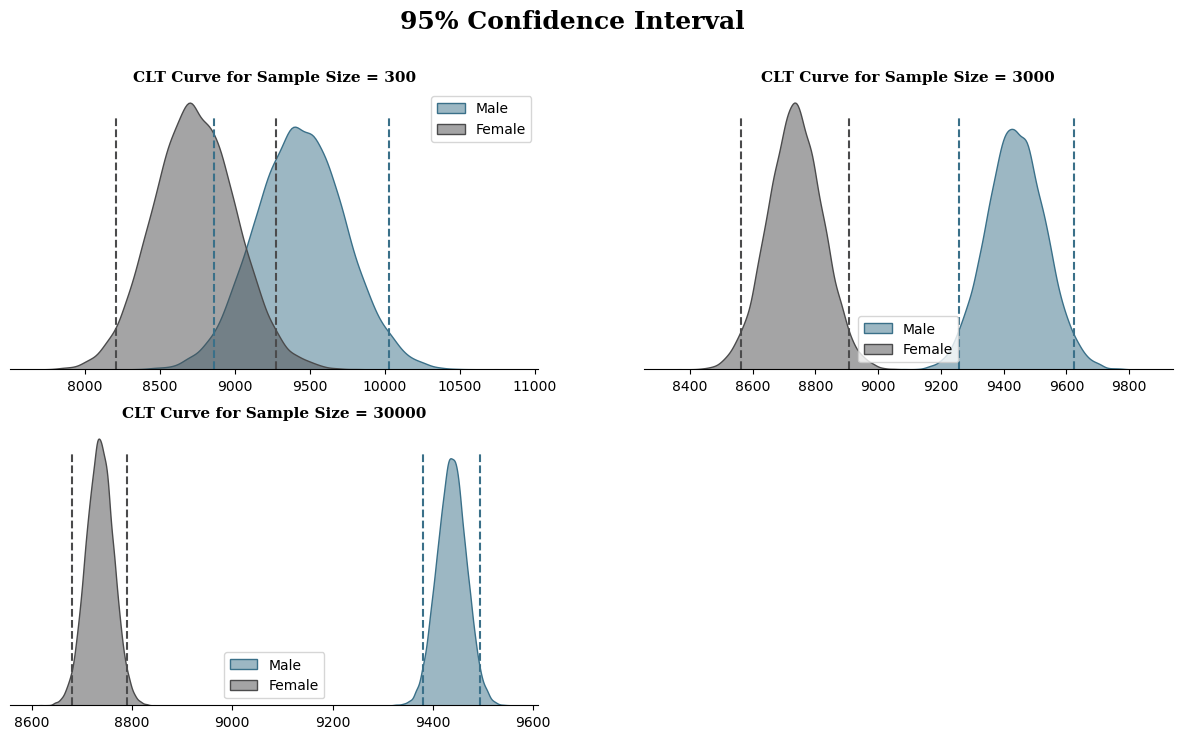

In [30]:
m_samp_95,f_samp_95 = plot(95)

### Are confidence intervals of average male and female spending overlapping?

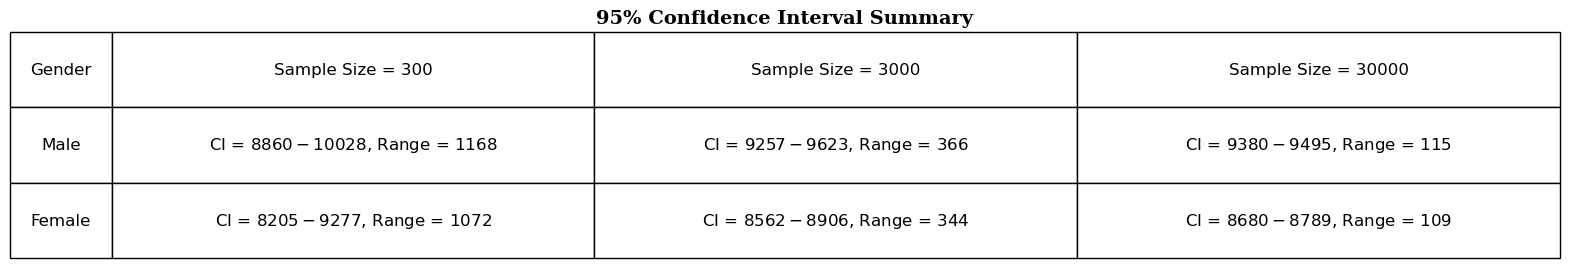

In [31]:
fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(3,1)

for i,j,k,l in [(m_samp_95,f_samp_95,95,1)]:
    #list for collecting ci for given cl
    m_ci = ['Male'] 
    f_ci = ['Female'] 
    
    #finding ci for each sample size (males)
    for m in i:  
        m_range = confidence_interval(i[m],k)
        m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")
        
    #finding ci for each sample size (females)
    for f in j:  
        f_range = confidence_interval(j[f],k)
        f_ci.append(f"CI = ${f_range[0]:.0f} - ${f_range[1]:.0f}, Range = {(f_range[1] - f_range[0]):.0f}")
    
                                        #plotting the summary
    ax = fig.add_subplot(gs[l])
    
    #contents of the table
    ci_info = [m_ci,f_ci]
    
    #plotting the table
    table = ax.table(cellText = ci_info, cellLoc='center',
                     colLabels =['Gender','Sample Size = 300','Sample Size = 3000','Sample Size = 30000'],
                     colLoc = 'center',colWidths = [0.05,0.2375,0.2375,0.2375,0.2375],bbox =[0, 0, 1, 1])

    table.set_fontsize(13)

    #removing axis 
    ax.axis('off')
    
    #setting title
    ax.set_title(f"{k}% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})


### Insights:

**1. Sample Size** 
   - The analysis highlights the importance of sample size in estimating population parameters. It suggests that `as the sample size increases, the confidence intervals become narrower and more precise`. In business, this implies that larger sample sizes can provide more reliable insights and estimates.

**2. Confidence Intervals** 
- From the above analysis, we can see that except for the Sample Size of 300, `the confidence interval do not overlap` as the sample size increases. This means that there is a statistically significant difference between the average spending per transaction for men and women within the given samples.

**3. Population Average**
- We are `95% confident` that the true population average for `males` falls between `$9,380 and $9,495`, and for `females`, it falls between `$8,681 and $8,789`.

**4. Women spend less**
- `Men tend to spend more money per transaction on average than women`, as the upper bounds of the confidence intervals for men are consistently higher than those for women across different sample sizes.

### **5. How can Walmart leverage this conclusion to make changes or improvements?**

**5.1. Segmentation Opportunities**
- Walmart can create targeted marketing campaigns, loyalty programs, or product bundles to cater to the distinct spending behaviors of male and female customers. This approach may help maximize revenue from each customer segment.

**5.2. Pricing Strategies**
- Based on the above data of average spending per transaction by gender, they might adjust pricing or discount strategies to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.


### **`Note`**
- Moving forward in our analysis, we will use `95% Confidence Level` only.

### How does Marital_Status affect the amount spent?

In [32]:
#defining a function for plotting the visual for given confidence interval

def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (15,8))
    gs = fig.add_gridspec(2,2)

    #creating separate data frames 
    df_married = df.loc[df['Marital_Status'] == 1,'Purchase']
    df_unmarried = df.loc[df['Marital_Status'] == 0,'Purchase']

    #sample sizes and corresponding plot positions
    sample_sizes = [(300,0,0),(3000,0,1),(30000,1,0)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    married_samples = {}
    unmarried_samples = {}
    
    for i,x,y in sample_sizes:
        married_means = [] #list for collecting the means of married sample
        unmarried_means = [] #list for collecting the means of unmarried sample

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            married_bootstrapped_samples = np.random.choice(df_married,size = i)
            unmarried_bootstrapped_samples = np.random.choice(df_unmarried,size = i)

            #calculating mean of those samples
            married_sample_mean = np.mean(married_bootstrapped_samples)
            unmarried_sample_mean = np.mean(unmarried_bootstrapped_samples)

            #appending the mean to the list
            married_means.append(married_sample_mean)
            unmarried_means.append(unmarried_sample_mean)
            
        #storing the above sample generated
        married_samples[f'{ci}%_{i}'] = married_means
        unmarried_samples[f'{ci}%_{i}'] = unmarried_means

        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'married_means':married_means,'unmarried_means':unmarried_means})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x,y])
        
        #plots for married and unmarried
        sns.kdeplot(data = temp_df,x = 'married_means',color ="#3A7089" ,fill = True, alpha = 0.5,ax = ax,label = 'Married')
        sns.kdeplot(data = temp_df,x = 'unmarried_means',color ="#4b4b4c" ,fill = True, alpha = 0.5,ax = ax,label = 'Unmarried')

        #calculating confidence intervals for given confidence level(ci)
        m_range = confidence_interval(married_means,ci)
        u_range = confidence_interval(unmarried_means,ci)

        #plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="#3A7089",linestyle = '--')

        for k in u_range:
            ax.axvline(x = k,ymax = 0.9, color ="#4b4b4c",linestyle = '--')


        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()
    
    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()
    
    return married_samples,unmarried_samples

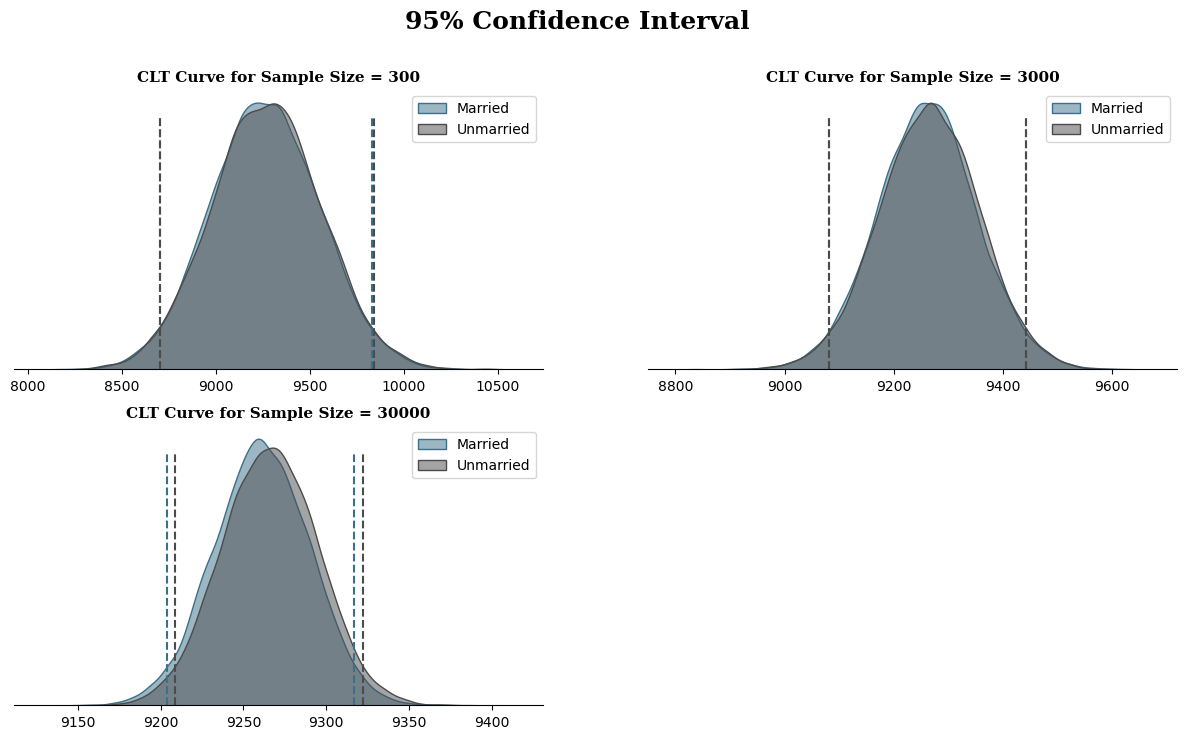

In [33]:
m_samp_95,u_samp_95 = plot(95)

### Are confidence intervals of average married and unmarried customer spending overlapping?

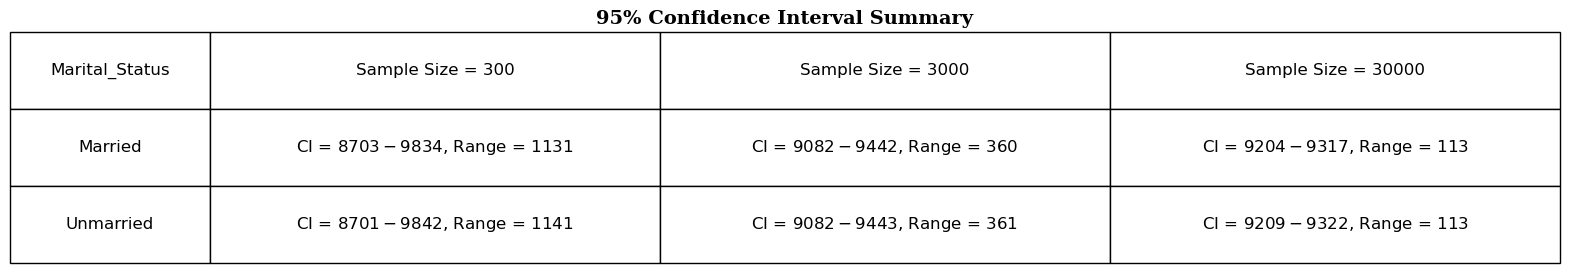

In [34]:
#setting the plot style
fig,ax = plt.subplots(figsize = (20,3))

#list for collecting ci for given cl
m_ci = ['Married'] 
u_ci = ['Unmarried'] 

#finding ci for each sample size (married)
for m in m_samp_95:  
    m_range = confidence_interval(m_samp_95[m],95)
    m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")

#finding ci for each sample size (unmarried)
for u in u_samp_95:  
    u_range = confidence_interval(u_samp_95[u],95)
    u_ci.append(f"CI = ${u_range[0]:.0f} - ${u_range[1]:.0f}, Range = {(u_range[1] - u_range[0]):.0f}")

                                    #plotting the summary
#contents of the table
ci_info = [m_ci,u_ci]

#plotting the table
table = ax.table(cellText = ci_info, cellLoc='center',
             colLabels =['Marital_Status','Sample Size = 300','Sample Size = 3000','Sample Size = 30000'],
             colLoc = 'center',colWidths = [0.1,0.225,0.225,0.225,0.225],bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis 
ax.axis('off')

#setting title
ax.set_title(f"95% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

plt.show()

### Insights:

**1. Sample Size** 
   - The analysis highlights the importance of sample size in estimating population parameters. It suggests that `as the sample size increases, the confidence intervals become narrower and more precise`. In business, this implies that larger sample sizes can provide more reliable insights and estimates.

**2. Confidence Intervals** 
- From the above analysis, we can see that `the confidence interval overlap` for all the sample sizes. This means that there is `no statistically significant difference` between the average spending per transaction for married and unmarried customers within the given samples.

**3. Population Average**
- We are `95% confident` that the true population average for `married customers` falls between `$9,204 and $9,318`, and for `unmarried customers`, it falls between `$9,208 and $9,323`.

**4. Both the customers spend equal**
- The overlapping confidence intervals of average spending for married and unmarried customers indicate that `both married and unmarried customers spend a similar amount per transaction`. This implies a resemblance in spending behavior between the two groups.

### **5. How can Walmart leverage this conclusion to make changes or improvements?**

**5.1. Marketing Resources**
-  Walmart may not need to allocate marketing resources specifically targeting one group over the other. Instead, they can focus on broader marketing strategies that appeal to both groups.

### How does Age affect the amount spent?

In [35]:
#defining a function for plotting the visual for given confidence interval

def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (15,15))
    gs = fig.add_gridspec(4,1)

    #creating separate data frames 
    
    df_1 = df.loc[df['Age'] == '0-17','Purchase']
    df_2 = df.loc[df['Age'] == '18-25','Purchase']
    df_3 = df.loc[df['Age'] == '26-35','Purchase']
    df_4 = df.loc[df['Age'] == '36-45','Purchase']
    df_5 = df.loc[df['Age'] == '46-50','Purchase']
    df_6 = df.loc[df['Age'] == '51-55','Purchase']
    df_7 = df.loc[df['Age'] == '55+','Purchase']
    

    #sample sizes and corresponding plot positions
    sample_sizes = [(300,0),(3000,1),(30000,2)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    samples1,samples2,samples3,samples4,samples5,samples6,samples7 = {},{},{},{},{},{},{}
    
    for i,x in sample_sizes:
        l1,l2,l3,l4,l5,l6,l7 = [],[],[],[],[],[],[]

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            bootstrapped_samples_1 = np.random.choice(df_1,size = i)
            bootstrapped_samples_2 = np.random.choice(df_2,size = i)
            bootstrapped_samples_3 = np.random.choice(df_3,size = i)
            bootstrapped_samples_4 = np.random.choice(df_4,size = i)
            bootstrapped_samples_5 = np.random.choice(df_5,size = i)
            bootstrapped_samples_6 = np.random.choice(df_6,size = i)
            bootstrapped_samples_7 = np.random.choice(df_7,size = i)

            #calculating mean of those samples
            sample_mean_1 = np.mean(bootstrapped_samples_1)
            sample_mean_2 = np.mean(bootstrapped_samples_2)
            sample_mean_3 = np.mean(bootstrapped_samples_3)
            sample_mean_4 = np.mean(bootstrapped_samples_4)
            sample_mean_5 = np.mean(bootstrapped_samples_5)
            sample_mean_6 = np.mean(bootstrapped_samples_6)
            sample_mean_7 = np.mean(bootstrapped_samples_7)
            
            #appending the mean to the list
            l1.append(sample_mean_1)
            l2.append(sample_mean_2)
            l3.append(sample_mean_3)
            l4.append(sample_mean_4)
            l5.append(sample_mean_5)
            l6.append(sample_mean_6)
            l7.append(sample_mean_7)

        #storing the above sample generated
        samples1[f'{ci}%_{i}'] = l1
        samples2[f'{ci}%_{i}'] = l2
        samples3[f'{ci}%_{i}'] = l3
        samples4[f'{ci}%_{i}'] = l4
        samples5[f'{ci}%_{i}'] = l5
        samples6[f'{ci}%_{i}'] = l6
        samples7[f'{ci}%_{i}'] = l7

        
        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'0-17':l1,'18-25':l2,'26-35':l3,'36-45':l4,'46-50':l5,'51-55':l6,'55+':l7})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x])
        
        #plots
        for p,q in [('#3A7089', '0-17'),('#4b4b4c', '18-25'),('#99AEBB', '26-35'),('#5C8374', '36-45'),('#6F7597', '46-50'),
                 ('#7A9D54', '51-55'),('#9EB384', '55+')]:
            
            sns.kdeplot(data = temp_df,x = q,color =p ,fill = True, alpha = 0.5,ax = ax,label = q)


        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()
    
    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()
    
    return samples1,samples2,samples3,samples4,samples5,samples6,samples7

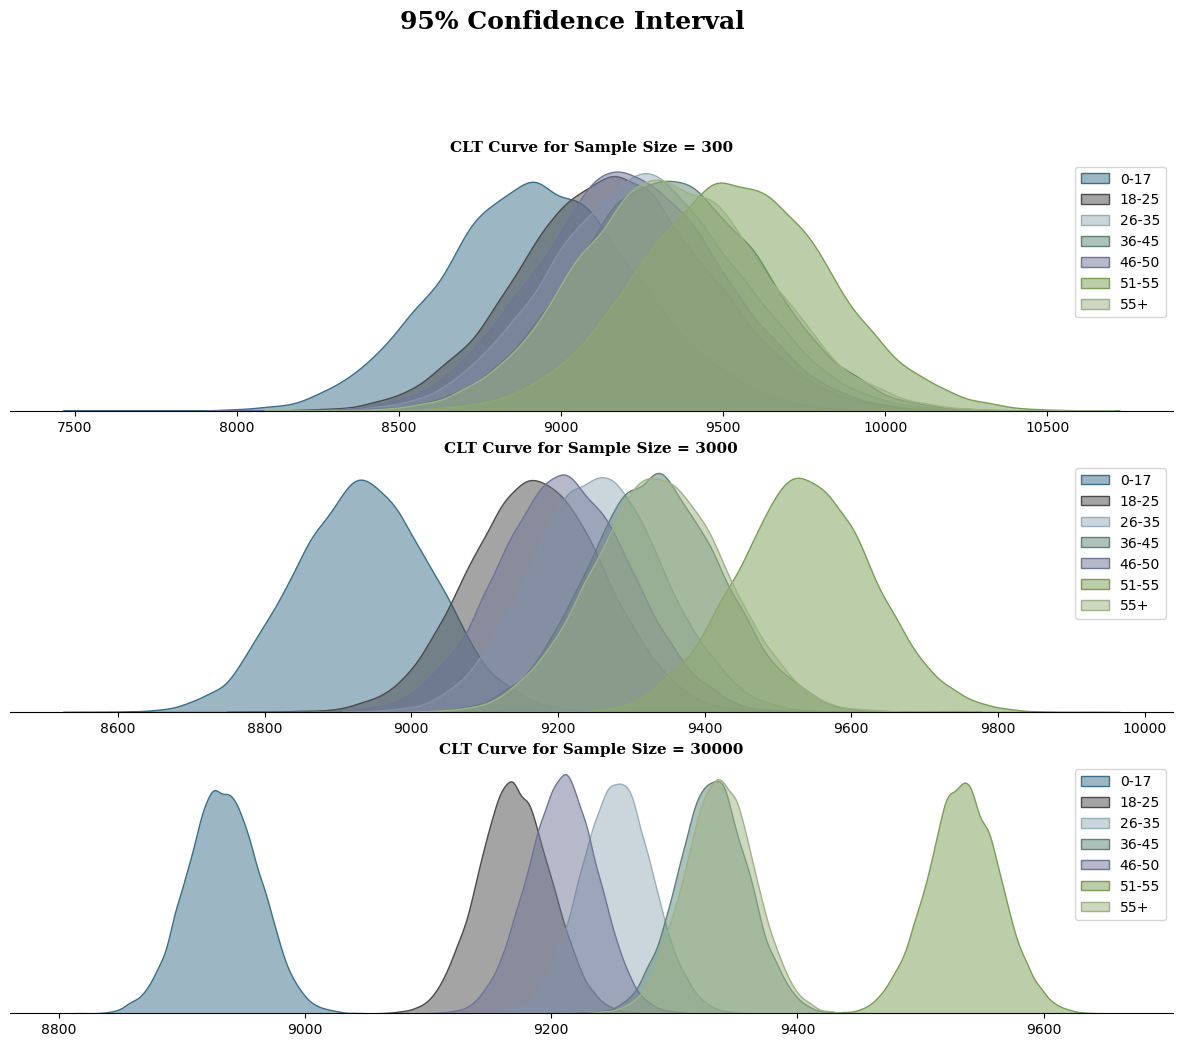

In [36]:
samples1,samples2,samples3,samples4,samples5,samples6,samples7 = plot(95)

### Are confidence intervals of customer's age-group spending overlapping?

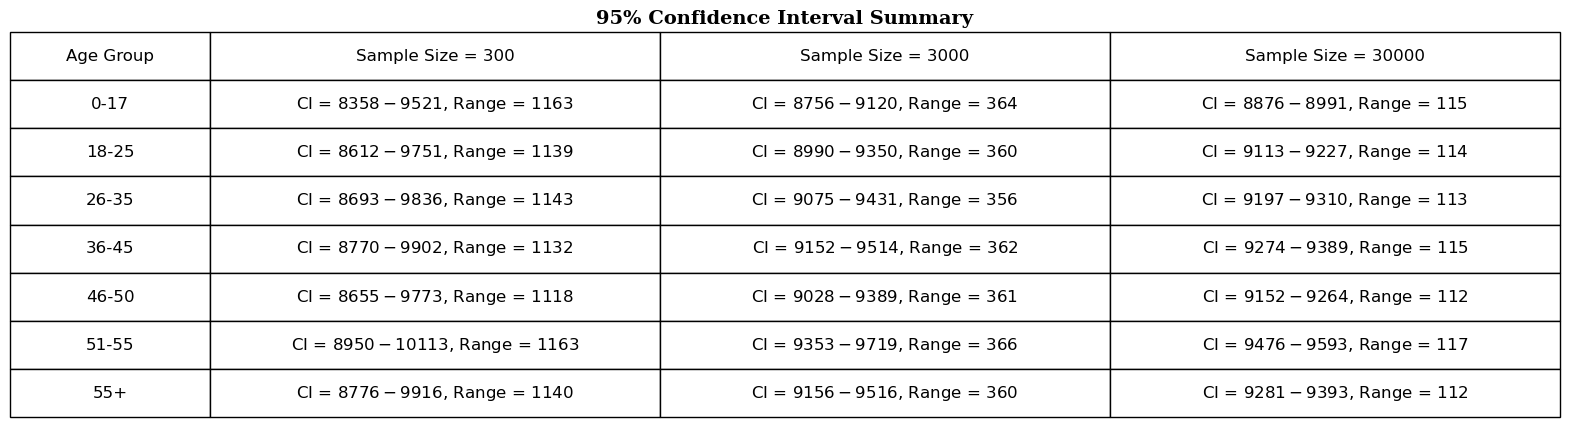

In [37]:
#setting the plot style
fig,ax = plt.subplots(figsize = (20,5))

#list for collecting ci for given cl
ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7 = ['0-17'],['18-25'],['26-35'],['36-45'],['46-50'],['51-55'],['55+']

#finding ci for each sample size 
#samples = [samples1,samples2,samples3,samples4,samples5,samples6,samples7]

samples = [(samples1,ci_1),(samples2,ci_2),(samples3,ci_3),(samples4,ci_4),(samples5,ci_5),(samples6,ci_6),(samples7,ci_7)]

for s,c in samples:
    for i in s:
        s_range = confidence_interval(s[i],95)
        c.append(f"CI = ${s_range[0]:.0f} - ${s_range[1]:.0f}, Range = {(s_range[1] - s_range[0]):.0f}")


                                    #plotting the summary
#contents of the table
ci_info = [ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7]

#plotting the table
table = ax.table(cellText = ci_info, cellLoc='center',
             colLabels =['Age Group','Sample Size = 300','Sample Size = 3000','Sample Size = 30000'],
             colLoc = 'center',colWidths = [0.1,0.225,0.225,0.225,0.225],bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis 
ax.axis('off')

#setting title
ax.set_title(f"95% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

plt.show()

### Insights:

**1. Sample Size** 
   - The analysis highlights the importance of sample size in estimating population parameters. It suggests that `as the sample size increases, the confidence intervals become narrower and more precise`. In business, this implies that larger sample sizes can provide more reliable insights and estimates.

**2. Confidence Intervals and customer spending patterns** 
- From the above analysis, we can see that `the confidence interval overlap` for some of the age groups. We can club the average spending into following age groups - 
    - 0 - 17 - Customers in this age group have the lowest spending per transaction
    - 18 - 25, 26 - 35, 46 - 50 -  Customers in these age groups have overlapping confidence intervals indicating similar buying characteristics
    - 36 - 45, 55+ - Customers in these age groups have overlapping confidence intervals indicating and similar spending patterns
    - 51 - 55 - Customers in this age group have the highest spending per transaction

**3. Population Average**
- We are `95% confident` that the true population average for following age groups falls between the below range -

    - 0 - 17 = \$ 8,876 to 8,991
    - 18 - 25 = \$ 9,113 to 9,227
    - 26 - 35 = \$ 9,196 to 9,309
    - 36 - 45 = \$ 9,274 to 9,389
    - 46 - 50 = \$ 9,153 to 9,264
    - 51 - 55 = \$ 9,477 to 9,591
    - 55+ = \$ 9,280 to 9,393


### **4. How can Walmart leverage this conclusion to make changes or improvements?**

**4.1. Targeted Marketing**
-  Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. Walmart can also tailor their product selection and marketing strategies to appeal to the preferences and needs of this age group

**4.2. Customer Segmentation**
-  Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.

**4.3 Premium Services**
- Recognizing that customers in the 51 - 55 age group have the highest spending per transaction, Walmart can explore opportunities to enhance the shopping experience for this demographic. This might involve offering premium services, personalized recommendations, or loyalty programs that cater to the preferences and spending habits of this age group.


# 8. Recommendations 

**1.Target Male Shoppers**
- Since male customers account for a significant portion of Black Friday sales and tend to spend more per transaction on average, Walmart should tailor its marketing strategies and product offerings to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.

**2. Focus on 26 - 45 Age Group**
-  With the age group between 26 and 45 contributing to the majority of sales, Walmart should specifically cater to the preferences and needs of this demographic.This could include offering exclusive deals on products that are popular among this age group.

**3. Engage Younger Shoppers**
- Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. It's essential to start building brand loyalty among younger consumers. 

**4. Customer Segmentation**
- Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.

**5. Enhance the 51 - 55 Age Group Shopping Experience**
- Considering that customers aged 51 - 55 have the highest spending per transaction, Walmart offer them exclusive pre-sale access, special discount or provide personalized product recommendations for this age group. Walmart can also introduce loyalty programs specifically designed to reward and retain customers in the 51 - 55 age group. 

**6. Post-Black Friday Engagement**
- After Black Friday, walmart should engage with customers who made purchases by sending follow-up emails or offers for related products. This can help increase customer retention and encourage repeat business throughout the holiday season and beyond.